# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date
from scipy.stats import linregress


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

In [ ]:
wKey = weather_api_key
unit = "imperial"

city = pd.DataFrame(cities)
city["City"] = cities
city["Lat"]=""
city["Lng"]=""
city["Max Temp"]=""
city["Humidity"]=""
city["Cloudiness"]=""
city["Wind Speed"]=""
city["Country"]=""
city["Date"]=""
city_df = city[["City", "Lat","Lng","Max Temp", "Humidity", "Cloudiness","Wind Speed", "Country","Date"]]
# city_df

In [24]:
# API calls and DataFrame fill

print(f"Beginning Data Retrieval")
print("----------------------------")

for index, row in city_df.iterrows():
    
    
    cityN = row["City"]
    city_name = row["City"].replace(" ","%20")
    base_url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&units={unit}&appid={wKey}"
#     print(base_url)
    
    time.sleep(1)
    response = requests.get(base_url)
    response_json = response.json()
    
    results = dict(response_json)
          
    try:
        print(f"Processing Record {index} | {cityN}")
        
        city_df.loc[index, 'Lat'] = results['coord']["lat"]
        city_df.loc[index, 'Lng'] = results['coord']["lon"]
        city_df.loc[index, 'Max Temp'] = results['main']["temp_max"]
        city_df.loc[index, 'Humidity'] = results['main']["humidity"]
        city_df.loc[index, 'Cloudiness'] = results['clouds']["all"]
        city_df.loc[index, 'Wind Speed'] = results['wind']["speed"]
        city_df.loc[index, 'Country'] = results['sys']["country"]
        city_df.loc[index, 'Date'] = results['dt']

    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------------")
print(f"Data Retrieval Complete")
print("-----------------------------")



    

Beginning Data Retrieval
----------------------------
Processing Record 0 | vaini
Processing Record 1 | ahuimanu
Processing Record 2 | amderma
City not found. Skipping...
Processing Record 3 | anadyr
Processing Record 4 | taolanaro
City not found. Skipping...
Processing Record 5 | arraial do cabo
Processing Record 6 | aguadulce
Processing Record 7 | souillac
Processing Record 8 | birnin kebbi
Processing Record 9 | bathsheba
Processing Record 10 | roald
Processing Record 11 | new norfolk
Processing Record 12 | mataura
Processing Record 13 | busselton
Processing Record 14 | punta arenas
Processing Record 15 | atuona
Processing Record 16 | fortuna
Processing Record 17 | mar del plata
Processing Record 18 | palabuhanratu
City not found. Skipping...
Processing Record 19 | barrow
Processing Record 20 | praia da vitoria
Processing Record 21 | tuktoyaktuk
Processing Record 22 | aflu
City not found. Skipping...
Processing Record 23 | atambua
Processing Record 24 | saint-philippe
Processing Reco

Processing Record 235 | parabel
Processing Record 236 | nelson bay
Processing Record 237 | warmbad
Processing Record 238 | ulaangom
Processing Record 239 | waingapu
Processing Record 240 | sile
Processing Record 241 | luka nad jihlavou
Processing Record 242 | ucluelet
Processing Record 243 | hinche
Processing Record 244 | upernavik
Processing Record 245 | mount gambier
Processing Record 246 | carutapera
Processing Record 247 | nuuk
Processing Record 248 | dawson creek
Processing Record 249 | pekan
Processing Record 250 | touros
Processing Record 251 | olinda
Processing Record 252 | la orilla
Processing Record 253 | tobe
Processing Record 254 | samalaeulu
City not found. Skipping...
Processing Record 255 | sovetskiy
Processing Record 256 | alenquer
Processing Record 257 | sayyan
Processing Record 258 | manadhoo
Processing Record 259 | abha
Processing Record 260 | hamilton
Processing Record 261 | kutum
Processing Record 262 | esperance
Processing Record 263 | leningradskiy
Processing Rec

Processing Record 462 | ola
Processing Record 463 | poum
Processing Record 464 | chake chake
Processing Record 465 | nardaran
Processing Record 466 | bilibino
Processing Record 467 | moron
Processing Record 468 | san miguel
Processing Record 469 | grand river south east
City not found. Skipping...
Processing Record 470 | meadow lake
Processing Record 471 | lander
Processing Record 472 | tirumullaivasal
Processing Record 473 | diego de almagro
Processing Record 474 | fare
Processing Record 475 | winneba
Processing Record 476 | plyussa
Processing Record 477 | aranos
Processing Record 478 | strezhevoy
Processing Record 479 | batemans bay
Processing Record 480 | the valley
Processing Record 481 | invermere
Processing Record 482 | amol
Processing Record 483 | lasa
Processing Record 484 | vila franca do campo
Processing Record 485 | el estor
Processing Record 486 | betki
City not found. Skipping...
Processing Record 487 | cascais
Processing Record 488 | bolkhov
Processing Record 489 | bajina

In [33]:
# Clear blank rows and export csv
cleanCity_df = city_df[city_df["Lat"].str.strip().astype(bool)].reset_index()
cleanCity_df.to_csv("city_weather.csv", index=False)

In [7]:
# Import csv and format
cleanCity_df= pd.read_csv("city_weather.csv")
cleanCityF_df = cleanCity_df.copy()
cleanCityF_df["Lat"] = cleanCityF_df["Lat"].map("{:.2f}".format)
cleanCityF_df["Lng"] = cleanCityF_df["Lng"].map("{:.2f}".format)
cleanCityF_df.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,vaini,-21.20,-175.20,75.36,69,20,12.66,TO,1627954382
1,1,ahuimanu,21.44,-157.84,87.51,56,1,14.97,US,1627954518
2,3,anadyr,64.75,177.48,50.50,81,90,17.00,RU,1627954386
3,5,arraial do cabo,-22.97,-42.03,67.48,82,2,17.81,BR,1627954383
4,6,aguadulce,8.25,-80.55,78.13,86,100,4.85,PA,1627954525


In [6]:
# Create stats table
cityStats_df = cleanCity_df[["Lat","Lng","Max Temp", "Humidity", "Cloudiness","Wind Speed","Date"]].astype(float).describe()
cityStats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.045854,17.983574,69.050863,69.683453,49.721223,7.529838,1.627955e+09
std,33.192669,90.493736,14.047969,21.047792,40.095242,5.209851,3.547996e+02
min,-54.800000,-179.166700,33.100000,9.000000,0.000000,0.000000,1.627954e+09
25%,-6.972175,-59.229075,57.970000,58.000000,5.000000,3.440000,1.627954e+09
50%,24.405750,23.185800,70.600000,75.000000,45.000000,6.430000,1.627955e+09
75%,47.290525,100.340125,80.240000,85.250000,93.250000,10.360000,1.627955e+09
max,78.218600,179.316700,115.480000,100.000000,100.000000,28.770000,1.627955e+09


In [8]:
# Cities with humidity less than 100
cleanCityLH_df = cleanCity_df.loc[cleanCity_df["Humidity"]<100,:] 
cleanCityLH_df.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,vaini,-21.2000,-175.2000,75.36,69,20,12.66,TO,1627954382
1,1,ahuimanu,21.4447,-157.8378,87.51,56,1,14.97,US,1627954518
2,3,anadyr,64.7500,177.4833,50.50,81,90,17.00,RU,1627954386
3,5,arraial do cabo,-22.9661,-42.0278,67.48,82,2,17.81,BR,1627954383
4,6,aguadulce,8.2500,-80.5500,78.13,86,100,4.85,PA,1627954525


## Latitude vs. Temperature Plot

In [5]:
# Todays Date
calcDate = date.today()
today = calcDate.strftime("%m/%d/%y")
print(f"({today})")

(08/05/21)


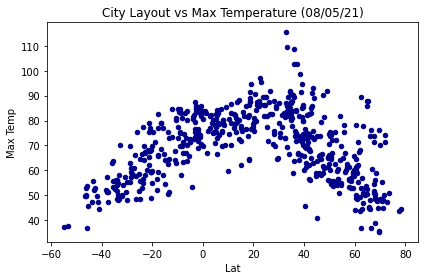

In [10]:
# Temp vs Lat Scatter
cleanCityLH_df.plot.scatter(x="Lat", y="Max Temp", c="DarkBlue")
plt.title(f"City Layout vs Max Temperature ({today})")
plt.tight_layout()
plt.show()

This plot shows how the closer you get to the equator, the higher the max temperature tends to be or visa versa. 

## Latitude vs. Humidity Plot

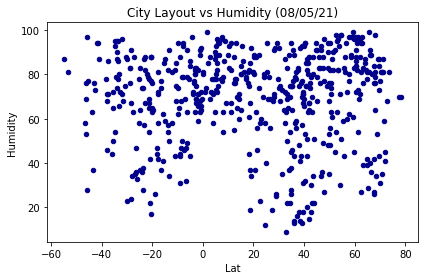

In [11]:
# Humidity vs Lat Scatter
cleanCityLH_df.plot.scatter(x="Lat", y="Humidity", c="DarkBlue")
plt.title(f"City Layout vs Humidity ({today})")
plt.tight_layout()
plt.show()

This plot shows the relative humidity of cities in relation to the equator. Based on chart, humidity tends to be higher north of the equator.

## Latitude vs. Cloudiness Plot

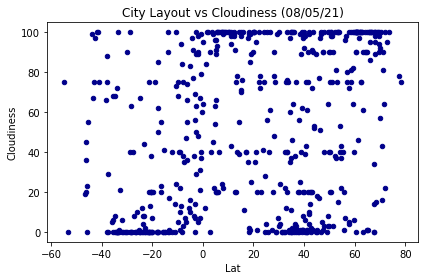

In [12]:
# Cloudiness vs Lat Scatter
cleanCityLH_df.plot.scatter(x="Lat", y="Cloudiness", c="DarkBlue")
plt.title(f"City Layout vs Cloudiness ({today})")
plt.tight_layout()
plt.show()

This plot shows the cloudiness of cities in relation to the equator. With such a wide variance, the chart shows than many cities are either 100 percent cloudy or completely sunny with many inbetween regardless of hemisphere.

## Latitude vs. Wind Speed Plot

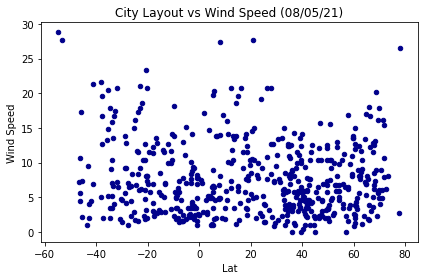

In [13]:
# Wind Speed vs Lat Scatter
cleanCityLH_df.plot.scatter(x="Lat", y="Wind Speed", c="DarkBlue")
plt.title(f"City Layout vs Wind Speed ({today})")
plt.tight_layout()
plt.show()

This chart shows the wind speeds in cities in relation to equator. This chart shows a majority of cities have wind speeds less thn 15mph regardless of hemisphere.

## Linear Regression Plots

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6105588026746734


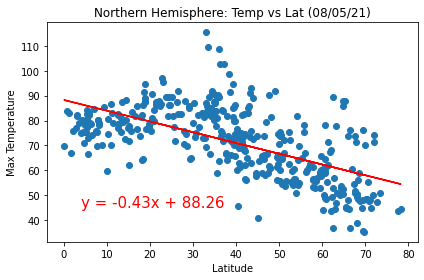

In [16]:
# Setting hemispheres
cleanCityNH_df = cleanCityLH_df.loc[cleanCityLH_df["Lat"]>0,:] 
cleanCitySH_df = cleanCityLH_df.loc[cleanCityLH_df["Lat"]<0,:] 


# Northern Hemisphere - Temp vs Lat

x_values = cleanCityNH_df['Lat']
y_values = cleanCityNH_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,45),fontsize=15,color="red")
plt.title(f"Northern Hemisphere: Temp vs Lat ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig(f"Images/NH_tempvslat.png")
plt.tight_layout()
plt.show()


This chart shows a large negative correlation between Latitude and Max Temperature for the northern hemisphere. This shows that the further north you travel from the equator, the lower the Max Temperature tends to be.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7998426232472057


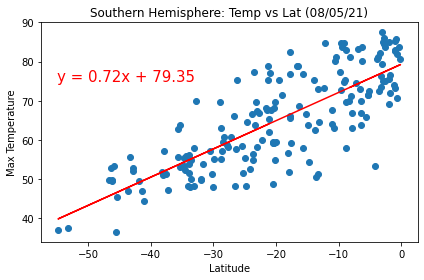

In [17]:
# Southern Hemisphere - Temp vs Lat

x_values = cleanCitySH_df['Lat']
y_values = cleanCitySH_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,75),fontsize=15,color="red")
plt.title(f"Southern Hemisphere: Temp vs Lat ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig(f"Images/SH_tempvslat.png")
plt.tight_layout()
plt.show()

This chart shows a large positive correlation for Latitude and Max Temperature in the southern hemisphere. This chart shows that the closer you travel to the equator, the higher the max temperature tends to be.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-value is: -0.04189664993165079


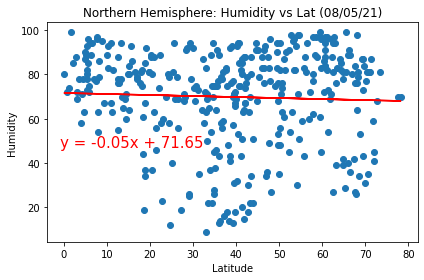

In [18]:
# Northern Hemisphere - Humidity vs Lat

x_values = cleanCityNH_df['Lat']
y_values = cleanCityNH_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-1,47),fontsize=15,color="red")
plt.title(f"Northern Hemisphere: Humidity vs Lat ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(f"Images/NH_humidityvslat.png")
plt.tight_layout()
plt.show()

In this chart, we have a little to no correlation between Latitude and Humidity in the northern hemisphere. With many of the cities hovering over 75 percent humidity, this correlation shows that humidity minimally drops, if any, the further north you travel. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.010464229995279064


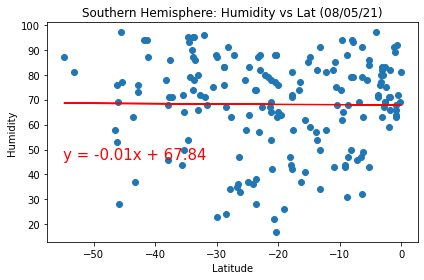

In [19]:
# Southern Hemisphere - Humidity vs Lat

x_values = cleanCitySH_df['Lat']
y_values = cleanCitySH_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,46),fontsize=15,color="red")
plt.title(f"Southern Hemisphere: Humidity vs Lat ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(f"Images/SH_humidityvslat.png")
plt.tight_layout()
plt.show()

This chart shows little to no correlation between humidity and Latitude in the southern hemisphere. While the chart shows that there is a small cluster of cities that are higher in humidity close to the equator, there is little data to prove that cities further south can not have humidity over 70 percent.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.043927085893789734


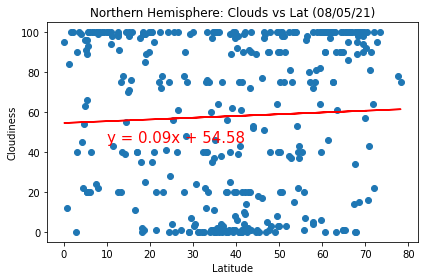

In [20]:
# Northern Hemisphere - Cloudiness vs Lat

x_values = cleanCityNH_df['Lat']
y_values = cleanCityNH_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="red")
plt.title(f"Northern Hemisphere: Clouds vs Lat ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(f"Images/NH_cloudsvslat.png")
plt.tight_layout()
plt.show()

There is little to no correlation between Latitude and Cloudiness for the northern hemisphere. Regardless of distance to equator, cities can have 0 to 100 percent cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13282045478119614


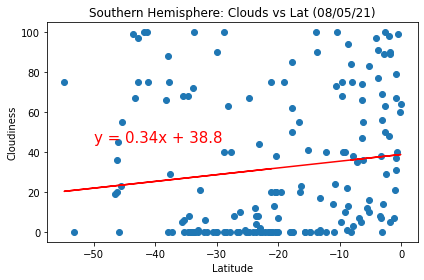

In [21]:
# Southern Hemisphere - Cloudiness vs Lat

x_values = cleanCitySH_df['Lat']
y_values = cleanCitySH_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
plt.title(f"Southern Hemisphere: Clouds vs Lat ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(f"Images/SH_cloudsvslat.png")
plt.tight_layout()
plt.show()

This data shows there is a small positive correlation between Latitude and Cloudiness in the southern hemisphere. With this data, the cloudiness in cities showed a small trend of increased cloudiness approaching the equator from the south.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.028087204315929447


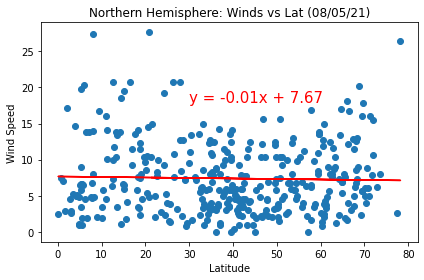

In [22]:
# Northern Hemisphere - Wind Speed vs Lat

x_values = cleanCityNH_df['Lat']
y_values = cleanCityNH_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,18),fontsize=15,color="red")
plt.title(f"Northern Hemisphere: Winds vs Lat ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig(f"Images/NH_windsvslat.png")
plt.tight_layout()
plt.show()

The data shows little to no correlation between Latitude and Wind Speed in the northern hemisphere. Many of the cities show similar wind speeds regardless of distance north from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3238071159609719


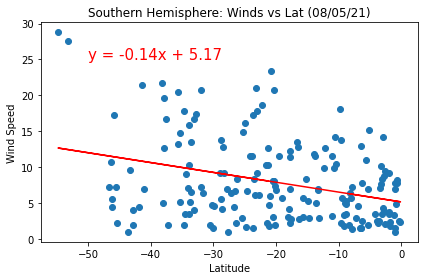

In [23]:
# Southern Hemisphere - Wind Speed vs Lat

x_values = cleanCitySH_df['Lat']
y_values = cleanCitySH_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title(f"Southern Hemisphere: Winds vs Lat ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig(f"Images/SH_windsvslat.png")
plt.tight_layout()
plt.show()

This data shows a medium negative correlation between Latitude and Wind Speeds in the southern hemisphere. There appears to be a slight pattern of decreased wind speeds as you move closer to the equator from the south.